In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
print(pd.__version__)

1.4.1


## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [3]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [4]:
carpeta="data/Only_training_hipotesis_salida/"

In [5]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/Only_training_hipotesis_salida/pTEST_new_0.2_9.csv.pickle'

In [6]:
dasdas =pd.read_pickle(a[0])
dasdas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2037788, 0.01616...","[0.0007424889, 0.0011908361, 0.9980667]","[0.0, 0.0, 1.0]",0,8883,contradiction,contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, frowning{frown,VE...","[NULL{null,PROPN}, an{an,DET}, angry{angry,ADJ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.020928295, 0.28484765, 0.1438...","[0.009199995, 0.9758755, 0.014924559]","[0.0, 1.0, 0.0]",0,270,neutral,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.027020607, 0.96290016, 0.010079146]","[0.0, 1.0, 0.0]",0,8297,neutral,neutral
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.19426414, 0.0403...","[0.06715914, 0.12506096, 0.80777985]","[0.0, 0.0, 1.0]",0,3351,contradiction,contradiction
4,4,"[NULL{null,PROPN}, pretty{pretty,ADJ}, spring{...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2037788, 0.08460...","[0.95283586, 0.039231855, 0.007932238]","[1.0, 0.0, 0.0]",0,2166,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2671,"[NULL{null,PROPN}, a{a,DET}, little{little,ADJ...","[NULL{null,ADJ}, two{two,NUM}, people{people,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.16620766, 0.01119...","[0.010369298, 0.0029113367, 0.9867193]","[0.0, 1.0, 0.0]",1,9787,contradiction,neutral
2672,2672,"[NULL{null,ADJ}, two{two,NUM}, gondola{gondola...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.2151...","[0.030671807, 0.22047296, 0.7488553]","[0.0, 1.0, 0.0]",1,9806,contradiction,neutral
2673,2673,"[NULL{null,ADJ}, two{two,NUM}, gondola{gondola...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.17841...","[0.00012794005, 0.00055327616, 0.99931884]","[0.0, 0.0, 1.0]",1,9807,contradiction,contradiction
2674,2674,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[9.536099e-05, 0.0034259658, 0.99647874]","[0.0, 1.0, 0.0]",1,9812,contradiction,neutral


# vamos a hacer un conteo de cuantas fueron correctas y cuantas no

In [7]:
sp_h=dasdas[dasdas["Paraphrase"]==0]
cp_h=dasdas[dasdas["Paraphrase"]==1]

In [8]:
entailment_entailment=sp_h[sp_h["target_prediction"]=="entailment_entailment"].shape[0]
entailment_neutral=sp_h[sp_h["target_prediction"]=="entailment_neutral"].shape[0]
entailment_contradiction=sp_h[sp_h["target_prediction"]=="entailment_contradiction"].shape[0]
neutral_entailment=sp_h[sp_h["target_prediction"]=="neutral_entailment"].shape[0]
neutral_neutral=sp_h[sp_h["target_prediction"]=="neutral_neutral"].shape[0]
neutral_contradiction=sp_h[sp_h["target_prediction"]=="neutral_contradiction"].shape[0]
contradiction_entailment=sp_h[sp_h["target_prediction"]=="contradiction_entailment"].shape[0]
contradiction_neutral=sp_h[sp_h["target_prediction"]=="contradiction_neutral"].shape[0]
contradiction_contradiction=sp_h[sp_h["target_prediction"]=="contradiction_contradiction"].shape[0]

KeyError: 'target_prediction'

In [ ]:
pentailment_entailment=cp_h[cp_h["target_prediction"]=="entailment_entailment"].shape[0]
pentailment_neutral=cp_h[cp_h["target_prediction"]=="entailment_neutral"].shape[0]
pentailment_contradiction=cp_h[cp_h["target_prediction"]=="entailment_contradiction"].shape[0]
pneutral_entailment=cp_h[cp_h["target_prediction"]=="neutral_entailment"].shape[0]
pneutral_neutral=cp_h[cp_h["target_prediction"]=="neutral_neutral"].shape[0]
pneutral_contradiction=cp_h[cp_h["target_prediction"]=="neutral_contradiction"].shape[0]
pcontradiction_entailment=cp_h[cp_h["target_prediction"]=="contradiction_entailment"].shape[0]
pcontradiction_neutral=cp_h[cp_h["target_prediction"]=="contradiction_neutral"].shape[0]
pcontradiction_contradiction=cp_h[cp_h["target_prediction"]=="contradiction_contradiction"].shape[0]

In [ ]:
print(entailment_entailment,pentailment_entailment)
print(entailment_neutral,pentailment_neutral)
print(entailment_contradiction,pentailment_contradiction)

443 25
38 100
9 365


In [7]:
ids=dasdas["Idx"].unique()
ids

array([8883,  270, 8297, ..., 9331, 6251, 1421])

In [8]:
len(ids)

1338

In [ ]:
for i in ids[:2]:
    fil=dasdas[dasdas["Idx"]==i]
    for index,strings in fil.iterrows():
        print(strings["predicted_label"],strings["gold_label"])

entailment entailment
contradiction entailment
entailment entailment
contradiction entailment


In [11]:
stats.zscore([[1,2,3,4],[4,3,2,1]])

array([[-1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.]])

# Procesamiento de todos los resultados para calcular la entropia de los alineamientos

In [10]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

In [12]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'entropia' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_entropia=[]
                for index,strings in temp.iterrows():
                    t=strings[1]
                    h=strings[2]
                    matriz=strings[5]
                    matriz_c=matriz[1:len(t)-1,1:len(h)-1]
                    l_entropia.append(entropia_f(stats.zscore(matriz_c.T).flatten()))
                new_data['entropia'].append(np.array(l_entropia[:]))
                new_data['Paraphrase'].append(i)
                l_entropia.clear()
dfn=pd.DataFrame(new_data)

/tmp/ipykernel_7553/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/tmp/ipykernel_7553/521637173.py:4: RuntimeWarning: divide by zero encountered in log2
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_7553/521637173.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_7553/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3

In [13]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [14]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [15]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,375,entailment_entailment,"[7.044, 5.322, 3.065, 6.459, 5.278, 6.085, 7.2...",0
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,41,entailment_neutral,"[5.335, 5.894, 5.533, 6.418, 7.094, 6.607, 6.0...",0
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,8,entailment_contradiction,"[7.353, 5.585, 7.418, 5.392, 6.465, 5.438, 5.3...",0
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,460,48,neutral_entailment,"[6.524, 5.92, 6.22, 5.74, 4.766, 6.656, 6.927,...",0
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,460,374,neutral_neutral,"[7.411, 6.787, 5.5, 6.629, 5.615, 5.926, 7.286...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1131,387,neutral_neutral,"[5.468, 6.797, 5.773, 6.766, 7.233, 5.929, 6.1...",1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1131,656,neutral_contradiction,"[6.533, 6.862, 7.222, 6.934, 6.118, 5.543, 6.9...",1
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1106,63,contradiction_entailment,"[6.824, 6.249, 5.807, 6.808, 5.492, 7.069, 6.7...",1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1106,229,contradiction_neutral,"[5.576, 6.129, 5.755, 3.17, 7.285, 7.339, 4.90...",1


In [16]:
len(dfn['grupo'].unique())

7

In [42]:
dfn['entropia'][0]

array([7.044, 5.322, 3.065, 6.459, 5.278, 6.085, 7.258, 5.585, 4.585,
       5.711, 6.142, 6.249, 5.612, 5.122, 4.893, 6.168, 6.54 , 7.285,
       4.807, 5.003, 4.807, 5.585, 5.392, 6.875, 6.75 , 5.884, 5.737,
       6.392, 5.844, 4.644, 7.013, 6.585, 5.027, 5.003, 5.002, 5.846,
       6.058, 5.129, 6.028, 6.084, 7.021, 5.457, 7.11 , 5.929, 6.022,
       6.608, 6.42 , 6.202, 6.394, 5.869, 5.767, 6.787, 6.129, 7.315,
       2.312, 7.037, 4.844, 6.065, 7.644, 5.17 , 7.136, 6.935, 7.401,
       7.047, 5.707, 6.293, 5.926, 6.74 , 7.431, 7.162, 6.712, 5.776,
       6.315, 5.707, 4.907, 6.437, 5.322, 6.2  , 7.029, 5.044, 6.244,
       6.573, 5.469, 4.948, 6.325, 7.106, 5.572, 6.127, 4.17 , 5.986,
       5.059, 6.821, 7.476, 7.473, 5.872,   nan, 7.209, 5.754, 6.847,
       7.857, 6.   , 5.329, 6.815, 5.74 , 6.129, 6.289, 6.129, 1.939,
       5.349, 6.54 , 5.644, 6.132, 6.913, 5.989, 5.002, 6.022, 6.549,
       4.522, 5.664, 5.846, 7.302, 6.136, 6.022, 5.285, 4.863, 6.002,
       5.444, 3.907,

In [18]:
etiquetas

['entailment', 'neutral', 'contradiction']

In [19]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [20]:
valores_labels=[]
for el in labels:
    a=dfn[(dfn['E_P']==el) & (dfn['Paraphrase']==0)]
    b=a['entropia'].values[0]
    valores_labels.append(b)
valores_labels

[array([7.044, 5.322, 3.065, 6.459, 5.278, 6.085, 7.258, 5.585, 4.585,
        5.711, 6.142, 6.249, 5.612, 5.122, 4.893, 6.168, 6.54 , 7.285,
        4.807, 5.003, 4.807, 5.585, 5.392, 6.875, 6.75 , 5.884, 5.737,
        6.392, 5.844, 4.644, 7.013, 6.585, 5.027, 5.003, 5.002, 5.846,
        6.058, 5.129, 6.028, 6.084, 7.021, 5.457, 7.11 , 5.929, 6.022,
        6.608, 6.42 , 6.202, 6.394, 5.869, 5.767, 6.787, 6.129, 7.315,
        2.312, 7.037, 4.844, 6.065, 7.644, 5.17 , 7.136, 6.935, 7.401,
        7.047, 5.707, 6.293, 5.926, 6.74 , 7.431, 7.162, 6.712, 5.776,
        6.315, 5.707, 4.907, 6.437, 5.322, 6.2  , 7.029, 5.044, 6.244,
        6.573, 5.469, 4.948, 6.325, 7.106, 5.572, 6.127, 4.17 , 5.986,
        5.059, 6.821, 7.476, 7.473, 5.872,   nan, 7.209, 5.754, 6.847,
        7.857, 6.   , 5.329, 6.815, 5.74 , 6.129, 6.289, 6.129, 1.939,
        5.349, 6.54 , 5.644, 6.132, 6.913, 5.989, 5.002, 6.022, 6.549,
        4.522, 5.664, 5.846, 7.302, 6.136, 6.022, 5.285, 4.863, 6.002,
      

In [21]:
len(valores_labels)

9

([<matplotlib.axis.XTick at 0x7fbe2c88f310>,
 [Text(0, 0, 'entailment_entailment'),
  Text(1, 0, 'entailment_neutral'),
  Text(2, 0, 'entailment_contradiction'),
  Text(3, 0, 'neutral_entailment'),
  Text(4, 0, 'neutral_neutral'),
  Text(5, 0, 'neutral_contradiction'),
  Text(6, 0, 'contradiction_entailment'),
  Text(7, 0, 'contradiction_neutral'),
  Text(8, 0, 'contradiction_contradiction')])

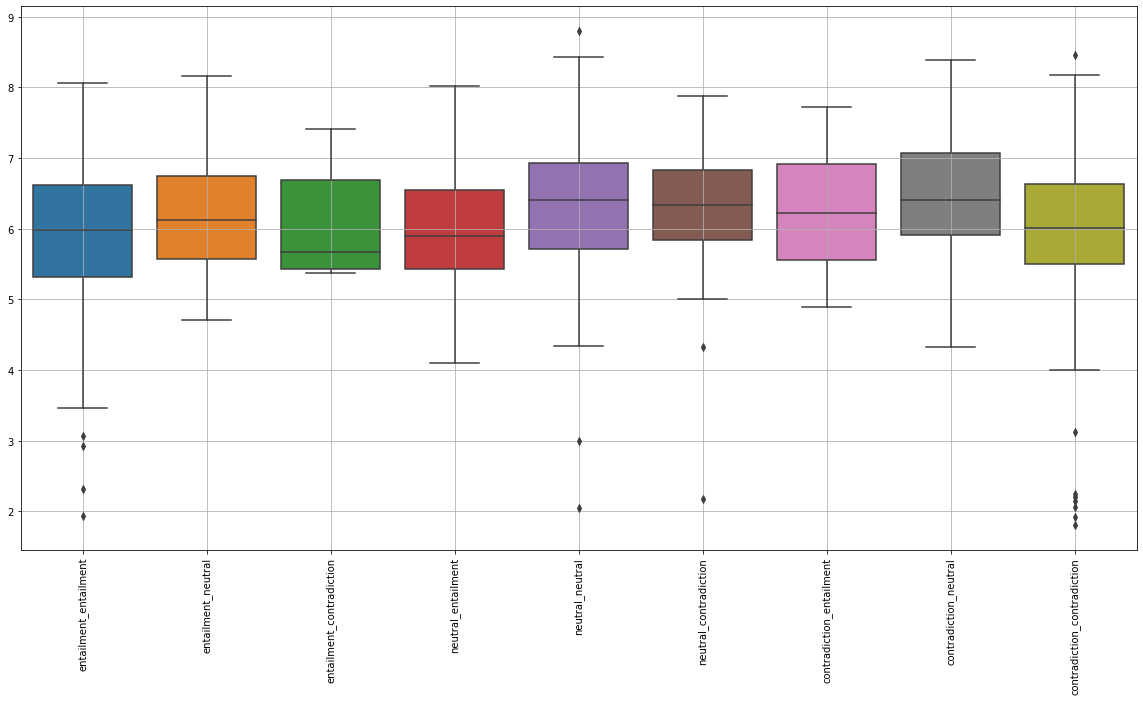

In [22]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(9),labels,rotation=90)

# Procesamiento para generar boxplot por muestreos

In [43]:
l_grupos=dfn.grupo.unique()
labels_g=[]
datos_g=[]
grupo_g=[]
for lg in l_grupos:
    for lab in labels:
        l_mean_entropia=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
        for index,strings in temp.iterrows():
            l_mean_entropia.append(np.nanmean(strings['entropia']))
        labels_g.append(lab)
        datos_g.append(l_mean_entropia[:])
        l_mean_entropia.clear()
        grupo_g.append(lg)

/tmp/ipykernel_7553/654303805.py:10: RuntimeWarning: Mean of empty slice
  l_mean_entropia.append(np.nanmean(strings['entropia']))


In [45]:
len(grupo_g)

63

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

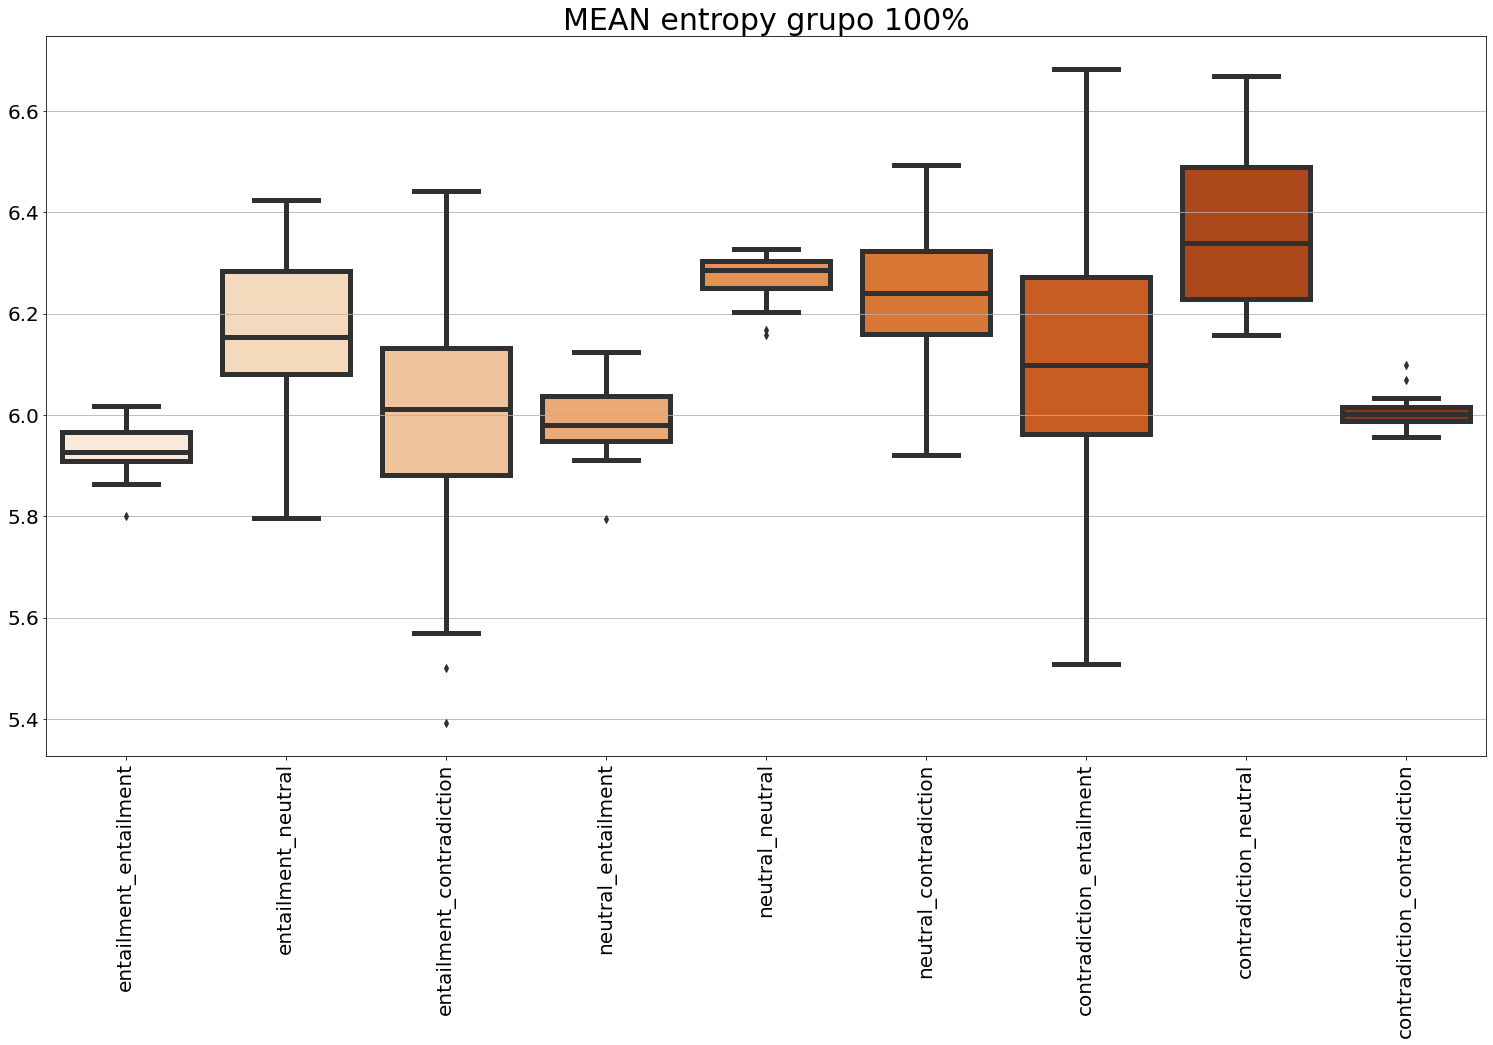

In [46]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[:9],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[:9],fontsize=20,rotation=90)


[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

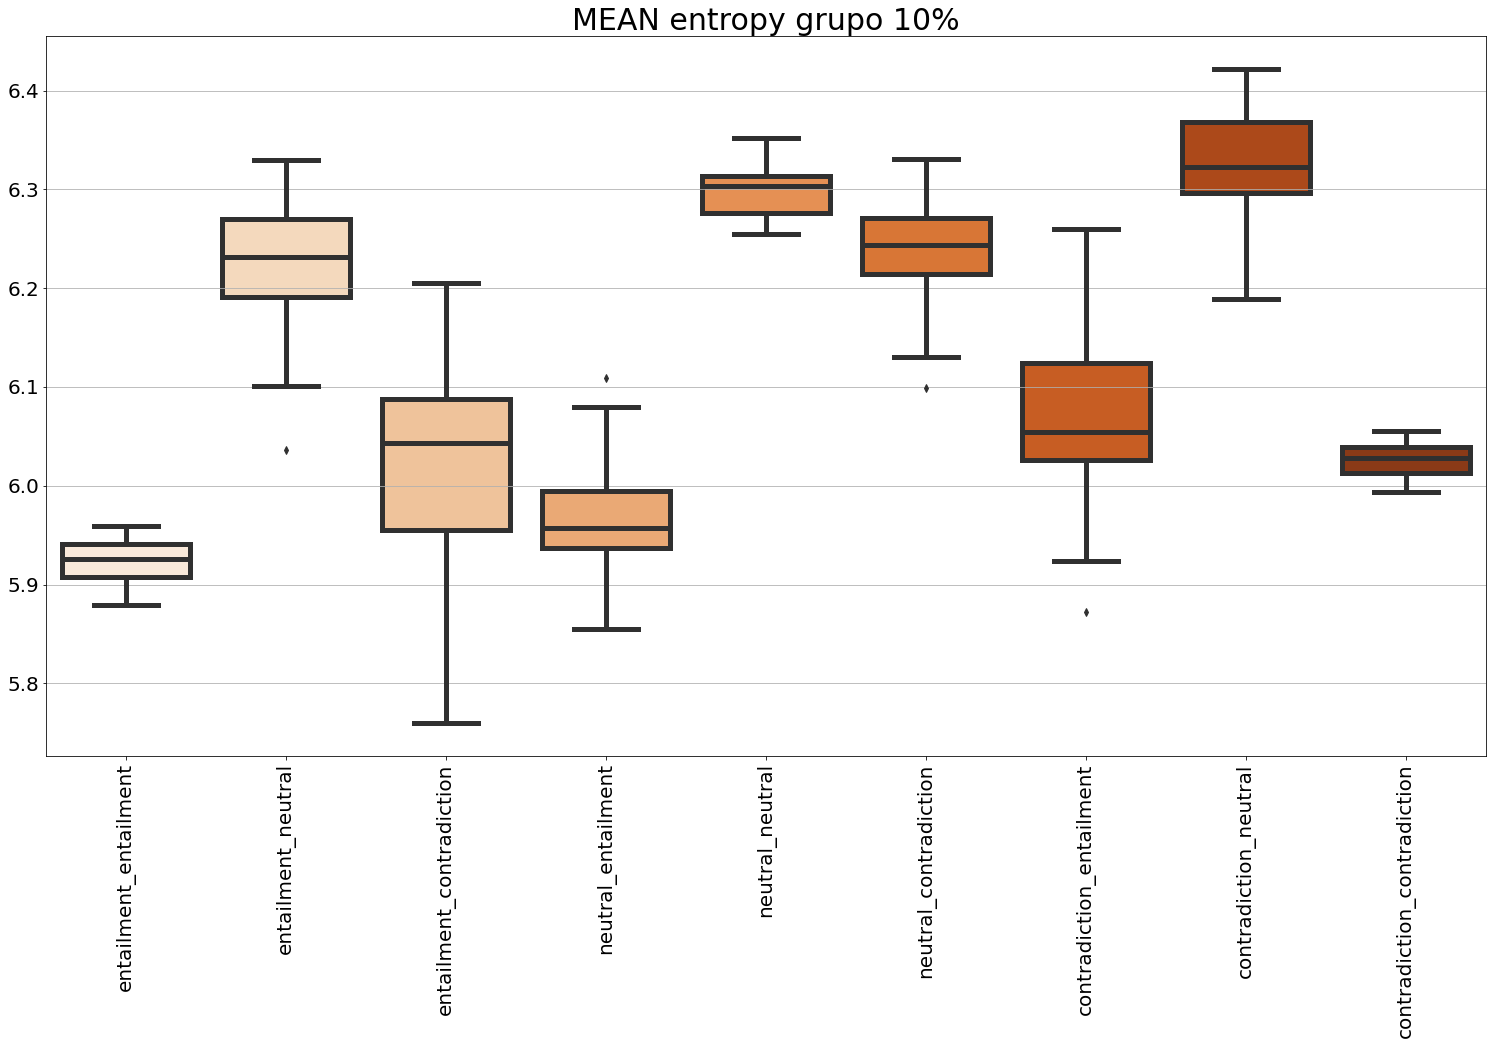

In [47]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[9:18],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[9:18],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

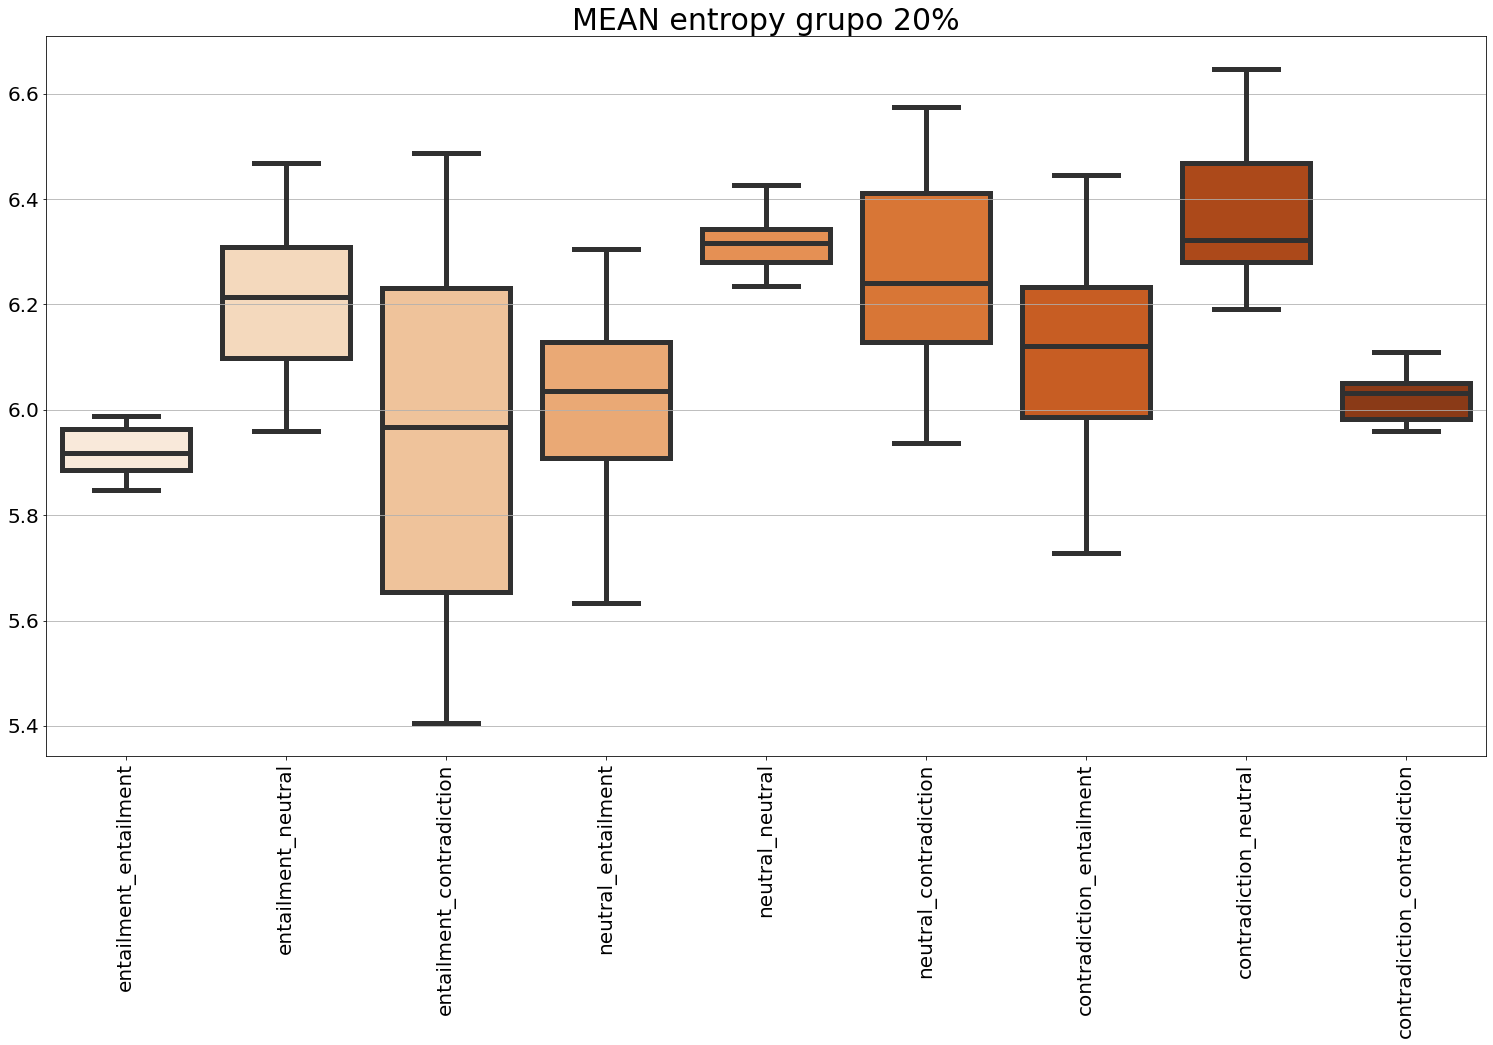

In [49]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[18:27],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[18:27],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

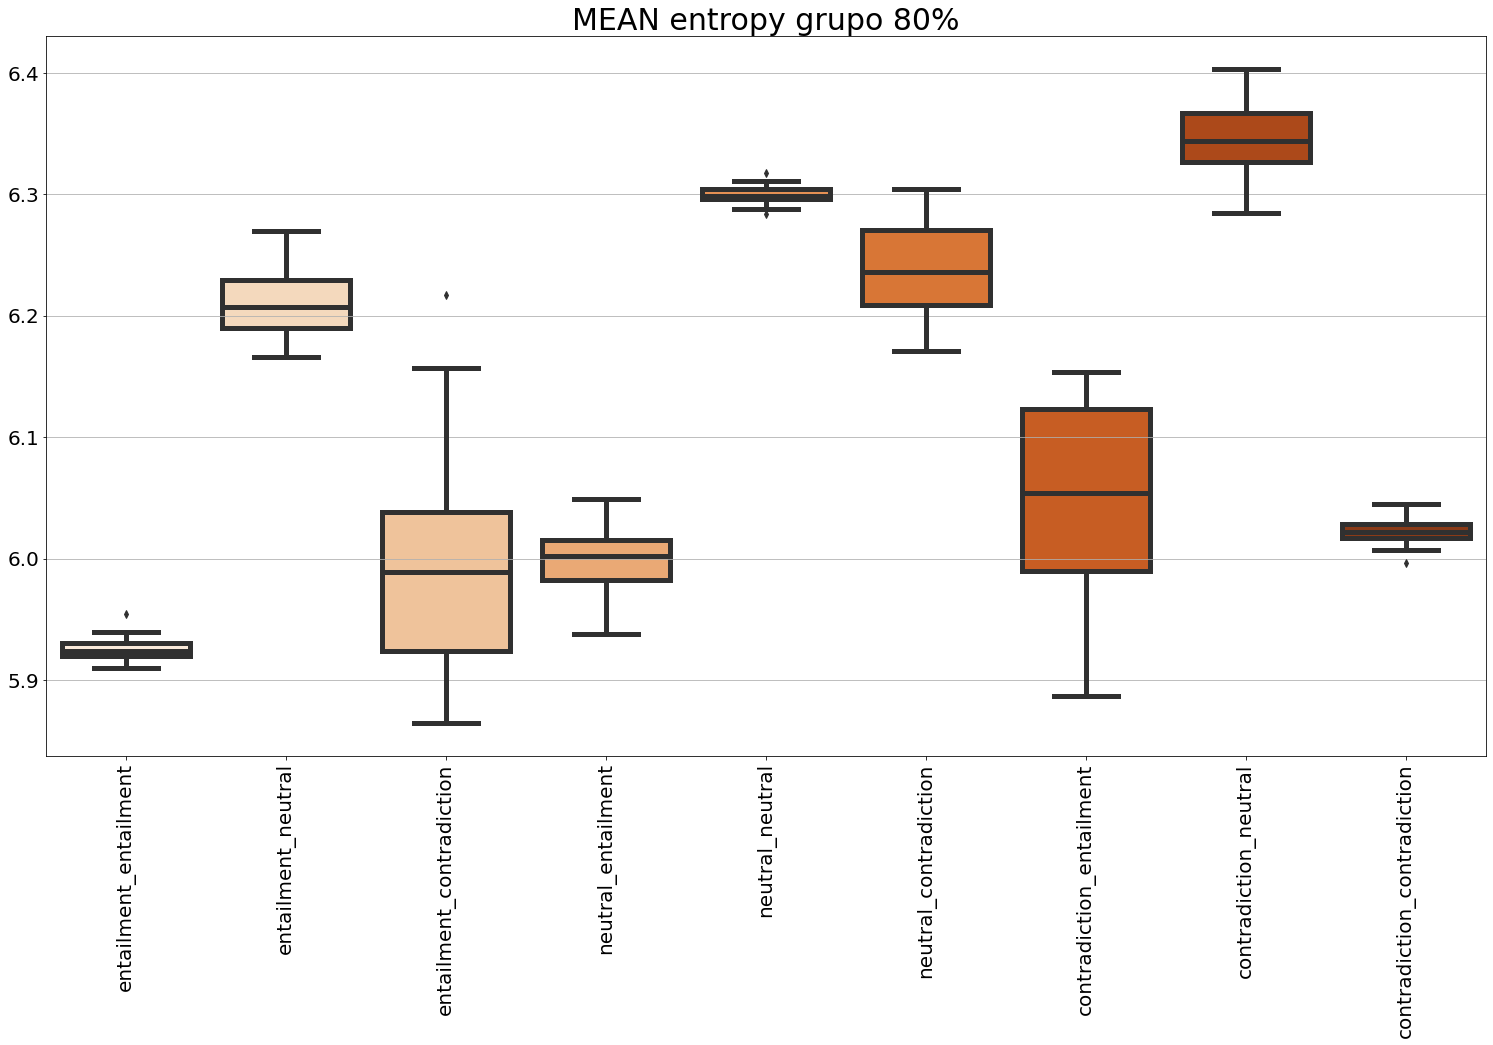

In [50]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[27:36],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[27:36],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

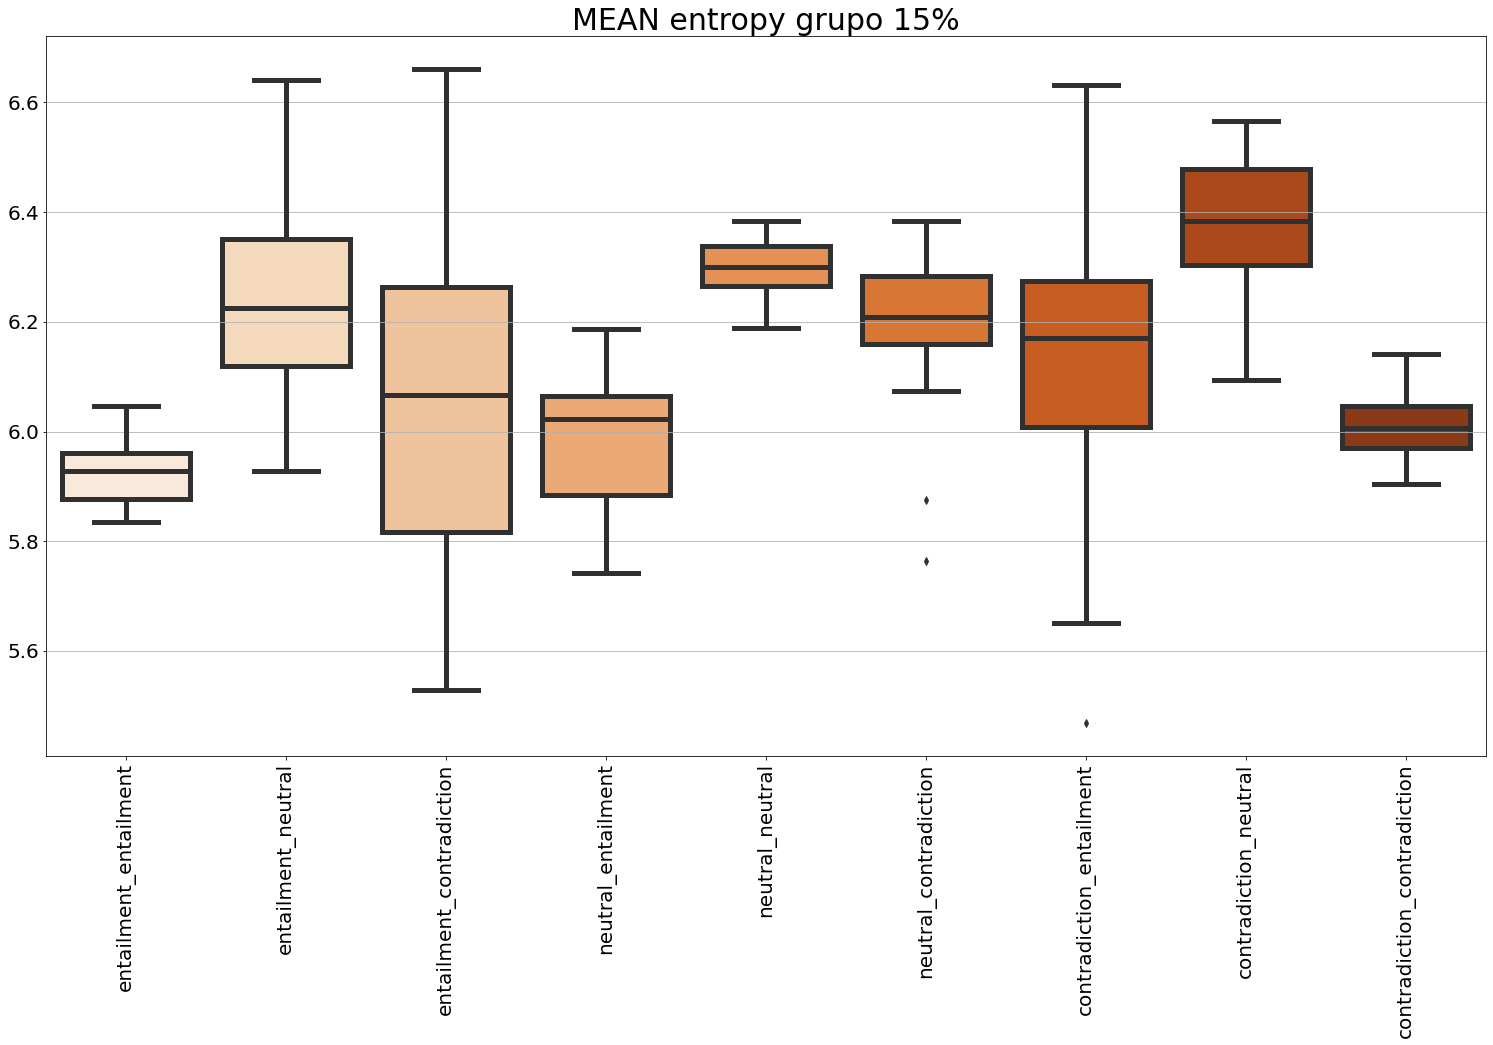

In [51]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[36:45],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[36:45],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

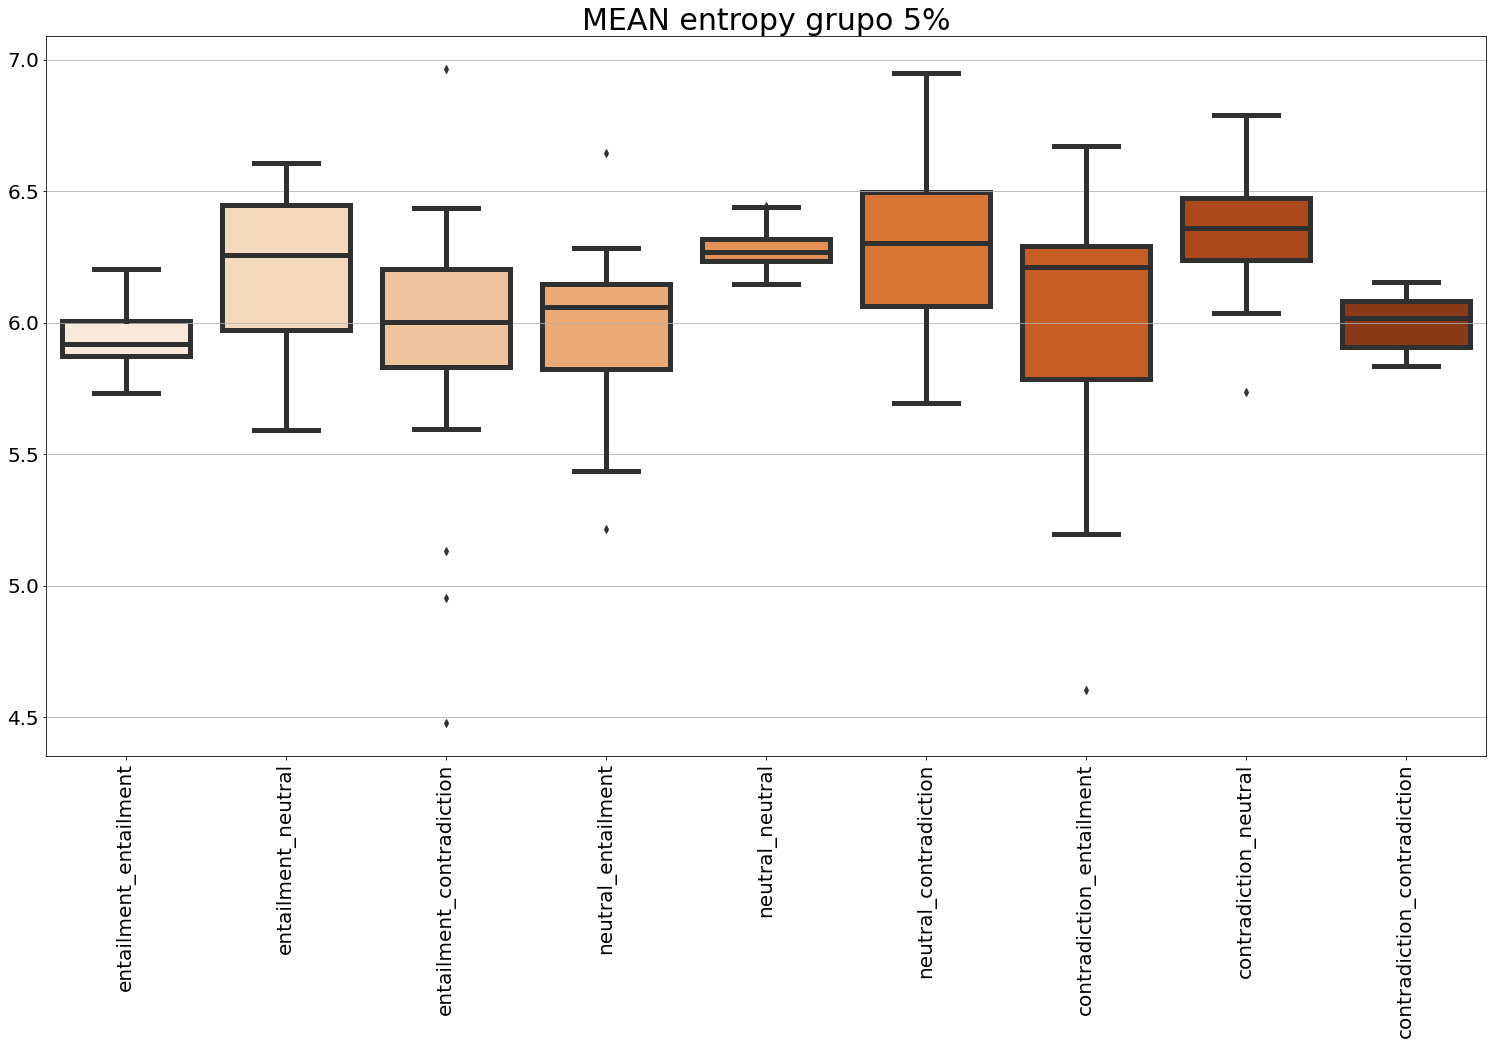

In [52]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[45:54],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[45:54],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

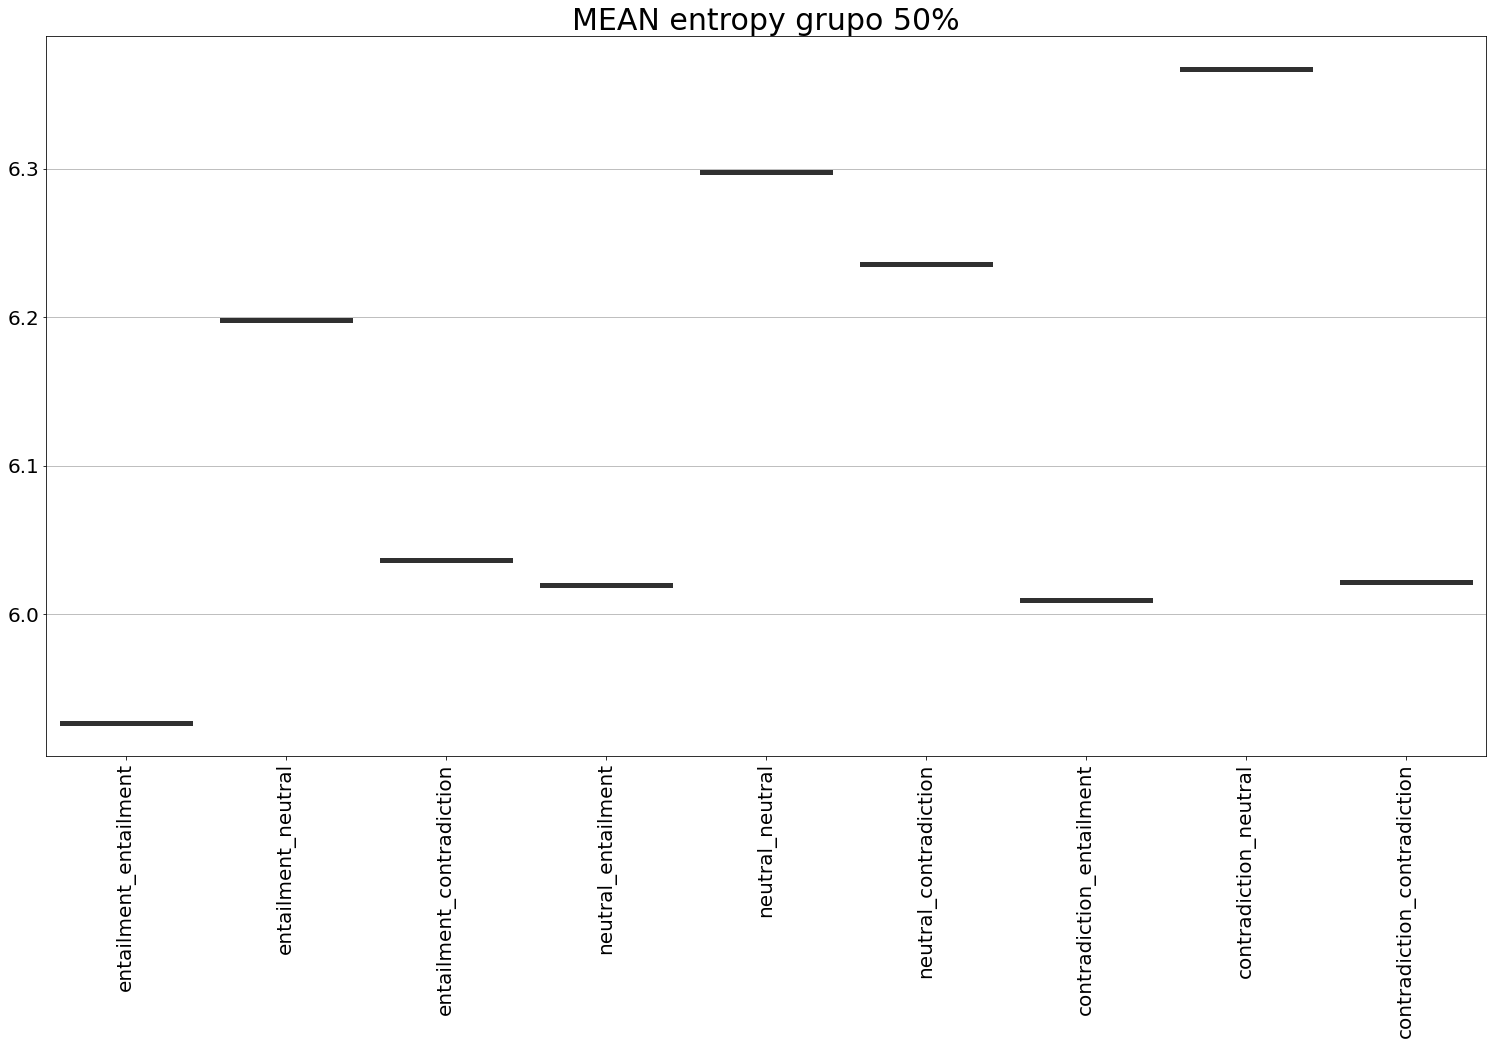

In [53]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[54:63],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[54:63],fontsize=20,rotation=90)